In [1]:
import numpy
import py_entropy
from matplotlib import pyplot
import scipy.stats
from tqdm.notebook import tqdm
import os
import scipy.special

pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
output_dir = "neelstate_and_density_variance"

os.makedirs(output_dir, exist_ok=True)

In [3]:
%%time

k = 1000
ne = 1000
ls = 2*numpy.arange(1,11)

filename = os.path.join(output_dir, f"neel_state_dens_var.npz")

if os.path.exists(filename):
    arr = numpy.load(filename)
    ls = arr['ls']
    pure_purities = arr['data']
    pure_densities = arr['dens']
    pure_variances = arr['var']
    hilbert_space_sizes = arr['Ds']
else:
    all_purities = []
    all_densities = []
    all_vars = []
    hilbert_space_sizes = []
    for l in tqdm(ls):
        s = py_entropy.MultiDefectState([numpy.arange(0,l,2)], 
                                        numpy.array([1.0], dtype=numpy.complex128), 
                                        l, l//2, num_experiments=ne)
        sector = (0, l//2)
        initial_densities, initial_variances = s.get_sector_densities_and_variance([sector])
        purities, densities, variances = s.apply_alternative_layers_and_save_mean_purity_and_density_and_variances(k, [sector])
        densities = numpy.array(list(initial_densities) + list(densities.flatten()))
        variances = numpy.array(list(initial_variances) + list(variances.flatten()))
        D = len(s.get_enumerated_states())
        all_purities.append(purities)
        all_densities.append(densities)
        all_vars.append(variances)
        hilbert_space_sizes.append(D)
    hilbert_space_sizes = numpy.array(hilbert_space_sizes)
    pure_purities = numpy.array(all_purities)
    pure_densities = numpy.array(all_densities)
    pure_variances = numpy.array(all_vars)
    numpy.savez(filename, data=pure_purities, dens=pure_densities, var=pure_variances, ls=ls, Ds=hilbert_space_sizes)

(pure_densities.shape, pure_variances.shape)

CPU times: user 1.93 ms, sys: 0 ns, total: 1.93 ms
Wall time: 1.7 ms


((10, 1001), (10, 1001))

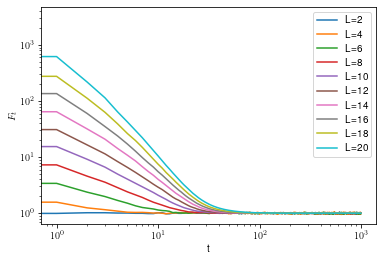

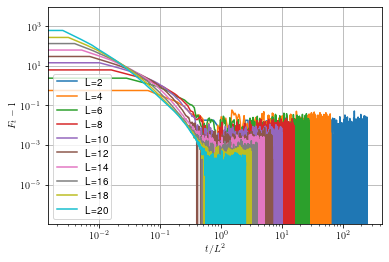

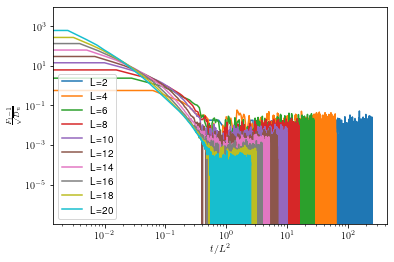

In [4]:
for l, purity in zip(ls, pure_purities):
    pyplot.plot(purity, label=f"L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for l, purity in zip(ls, pure_purities):
    pyplot.plot(numpy.arange(len(purity))/(l**2), purity - 1, label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, "neel_purities.pdf"))
pyplot.show()


for d, l, purity in zip(hilbert_space_sizes, ls, pure_purities):
    pyplot.plot(numpy.arange(len(purity))/(l**2), (purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\frac{F_t - 1}{\sqrt{D_n}}$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

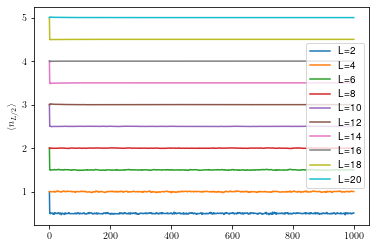

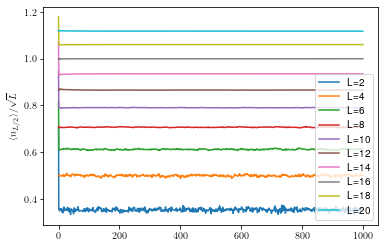

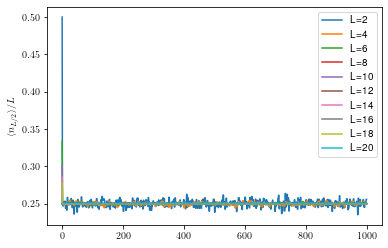

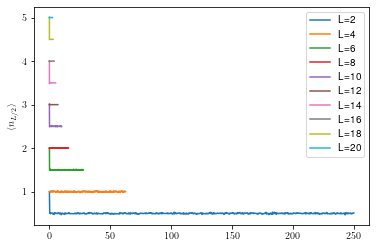

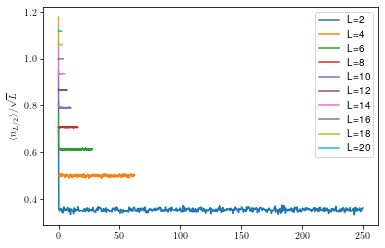

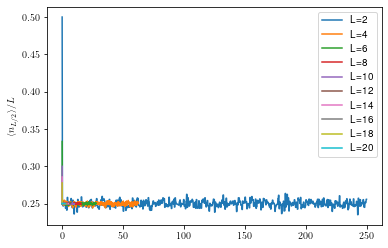

In [5]:
for l,dens in zip(ls, pure_densities):
    pyplot.plot(dens, label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\langle n_{L/2} \rangle$')
pyplot.show()

for l,dens in zip(ls, pure_densities):
    pyplot.plot(dens/numpy.sqrt(l), label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\langle n_{L/2} \rangle / \sqrt{L}$')
pyplot.show()

for l,dens in zip(ls, pure_densities):
    pyplot.plot(dens/l, label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\langle n_{L/2} \rangle / L$')
pyplot.show()

for l,dens in zip(ls, pure_densities):
    pyplot.plot(numpy.arange(len(dens))/l**2, dens, label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\langle n_{L/2} \rangle$')
pyplot.show()

for l,dens in zip(ls, pure_densities):
    pyplot.plot(numpy.arange(len(dens))/l**2, dens/numpy.sqrt(l), label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\langle n_{L/2} \rangle / \sqrt{L}$')
pyplot.show()

for l,dens in zip(ls, pure_densities):
    pyplot.plot(numpy.arange(len(dens))/l**2, dens/l, label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\langle n_{L/2} \rangle / L$')
pyplot.show()


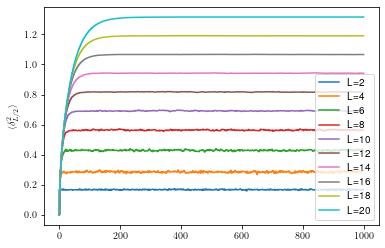

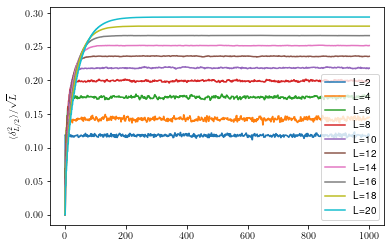

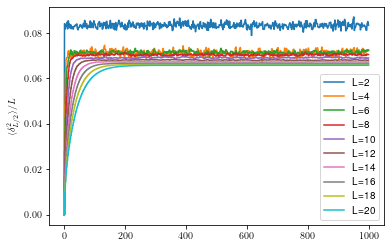

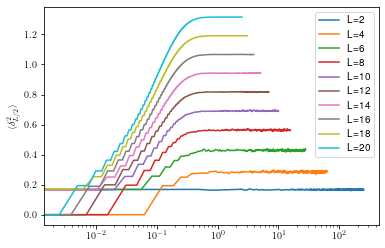

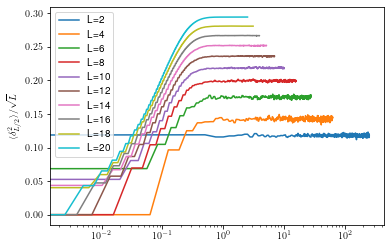

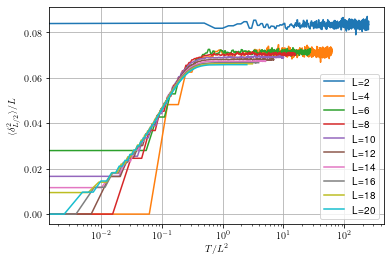

In [75]:
for l,v in zip(ls, pure_variances):
    pyplot.plot(v, label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\langle \delta_{L/2}^2 \rangle$')
pyplot.show()

for l,v in zip(ls, pure_variances):
    pyplot.plot(v/numpy.sqrt(l), label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\langle \delta_{L/2}^2 \rangle / \sqrt{L}$')
pyplot.show()

for l,v in zip(ls, pure_variances):
    pyplot.plot(v/l, label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\langle \delta_{L/2}^2 \rangle / L$')
pyplot.show()

for l,v in zip(ls, pure_variances):
    pyplot.plot(numpy.arange(len(v))/l**2, v, label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\langle \delta_{L/2}^2 \rangle$')
pyplot.xscale('log')
pyplot.show()

for l,v in zip(ls, pure_variances):
    pyplot.plot(numpy.arange(len(v))/l**2, v/numpy.sqrt(l), label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\langle \delta_{L/2}^2 \rangle / \sqrt{L}$')
pyplot.xscale('log')
pyplot.show()

for l,v in zip(ls, pure_variances):
    pyplot.plot(numpy.arange(len(v))/l**2, v/l, label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\langle \delta_{L/2}^2 \rangle / L$')
pyplot.xlabel(r'$T / L^2$')
pyplot.xscale('log')
pyplot.grid()
pyplot.savefig(os.path.join(output_dir,'variance.jpeg'))
pyplot.show()

In [50]:
l = 14
s = py_entropy.MultiDefectState([numpy.arange(0,l,2)], 
                                numpy.array([1.0], dtype=numpy.complex128), 
                                l, l//2, num_experiments=ne)
sector = (0, l//2)
initial_densities, initial_variances = s.get_sector_densities_and_variance([sector])
purities, densities, variances = s.apply_alternative_layers_and_save_mean_purity_and_density_and_variances(k, [sector])
densities = numpy.array(list(initial_densities) + list(densities.flatten()))
variances = numpy.array(list(initial_variances) + list(variances.flatten()))
D = len(s.get_enumerated_states())

In [51]:
# Get the states as lists of occupation indices.
states = s.get_enumerated_states()
# Get the amplitudes for each state (ignore the mixed state probs).
_, old_amps = s.get_state()

# 1000 replicas, 3432 states.
old_amps.shape

(1000, 1, 3432)

In [72]:
# Remove the middle dimension since pure state.
amps = old_amps.squeeze()

# Count all the occupations within the "sector"
state_dens = (states < sector[1]).sum(axis=-1)
state_dens = numpy.tile(state_dens, (1000,1))

# Get the average density in the sector indexed by replica.
mean_rho = (numpy.abs(amps)**2 * state_dens).sum(axis=-1)

# Get the difference of the state density and the average
# indexed by replica and state
dens_diff = state_dens - numpy.expand_dims(mean_rho, axis=-1)

var_rho = (numpy.abs(amps)**2 * dens_diff**2).sum(axis=-1).mean()

print("Dens", mean_rho.mean())
print("Var", var_rho)

Dens 3.5010564851655497
Var 0.942049454884957


In [74]:
# Compare to output calculated by simulation library
print("Dens", densities[-1])
print("Var", variances[-1])

Dens 3.5010564851655497
Var 0.942049454884957


In [80]:
states = s.get_enumerated_states()
state_dens = (states < sector[1]).sum(axis=-1)
((state_dens - state_dens.mean())**2).mean()

0.9423076923076923

In [92]:
new_ls = numpy.arange(2,24,2)
all_hilbert_ds = []
all_ideal_variances = []
for l in new_ls:
    s = py_entropy.MultiDefectState([numpy.arange(0,l,2)], 
                                    numpy.array([1.0], dtype=numpy.complex128), 
                                    l, l//2, num_experiments=ne)
    sector = (0, l//2)
    states = s.get_enumerated_states()
    D = states.shape[0]
    state_dens = (states < sector[1]).sum(axis=-1)
    ideal_variance = ((state_dens - state_dens.mean())**2).mean()
    all_hilbert_ds.append(D)
    all_ideal_variances.append(ideal_variance)
del states
del state_dens
del s

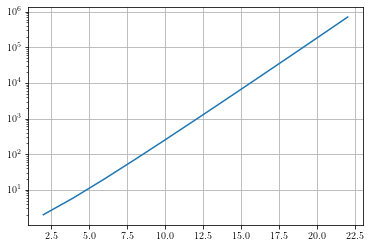

In [93]:
pyplot.plot(new_ls, all_hilbert_ds)
pyplot.yscale('log')
pyplot.grid()
pyplot.show()

In [150]:
def theory_variance(ls):
    ls = ls
    return ls**2 / (16*(ls-1))
    #return (1/numpy.sqrt(numpy.pi)) * (2**(2*ls - 3) * ls / scipy.special.binom(2*ls, ls)) * (scipy.special.gamma(ls - 0.5)/scipy.special.gamma(ls))

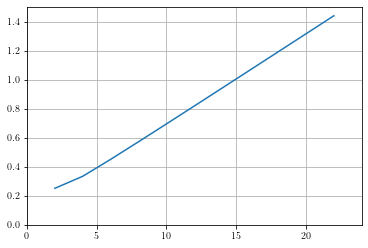

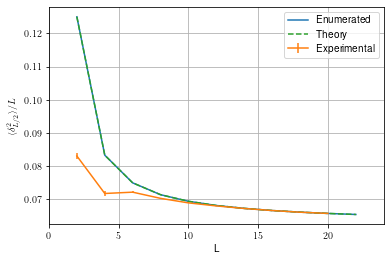

In [151]:
pyplot.plot(new_ls, all_ideal_variances)
pyplot.grid()
pyplot.ylim([0,1.5])
pyplot.xlim([0,24])
pyplot.show()

pyplot.plot(new_ls, all_ideal_variances / new_ls, label='Enumerated')
pyplot.errorbar(ls, pure_variances[:,-20:].mean(axis=-1)/ls,yerr=(pure_variances[:,-20:]).std(axis=-1)/ls, label='Experimental')
pyplot.plot(new_ls, theory_variance(new_ls)/new_ls, '--', label='Theory')
pyplot.grid()
pyplot.xlim([0,24])
pyplot.legend()
pyplot.xlabel('L')
pyplot.ylabel(r'$\langle \delta_{L/2}^2 \rangle /L$')
pyplot.show()